# Analyse des tracés de rayons et choix de la profondeur de la source (partie 4.3 du rapport + Annexe E) 

Il s'agit d'optimiser les positions de la source et du flotteur sous différents profils de célérité.

- **Source** : de 0 à 100m
- **Flotteur** : de 100 à 500m
- 4 profils en Méditerrannée + profils sur la zone du Gulf Stream

In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

from clib.flow import *
from clib.bellhop import *

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
s = bellhop({'mediterrannee': '../SSP_4profils.mat'},name='med_2000m')

---
---
# Profil n°3 (exemple de la partie 4.3 du rapport)
---
---
### . Création des fichiers environnement (.env)

In [3]:
issp=2                           # sound speed profile number
depth_source = [10.]             # list of chosen source depths

## 'R' files
s.params['file_type'] = 'R'
s.params['ALimites'] = [-15.0, 15.0]
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env ='%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = '%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

## 'IB' files    
s.params['file_type'] = 'IB'
s.params['ALimites'] = [-90.0, 90.0]
s.params['NDepth'] = 501
s.params['NRange'] = 1001
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env = '%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = '%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

 - On lance ensuite les simulations bellhop. on obtient les fichiers '.ray' et '.shd'.

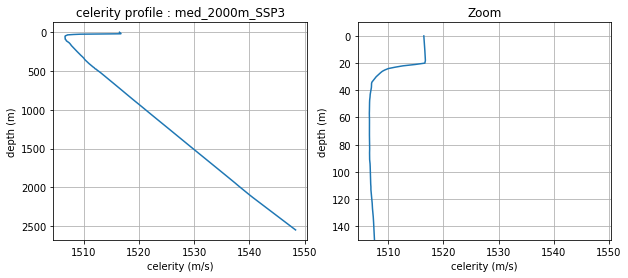

In [4]:
s.plotssp('mediterrannee', Issp=2)

---
### . Source à 10m

In [5]:
geometry10, pressure10 = s.readshd('10m_IB.shd')

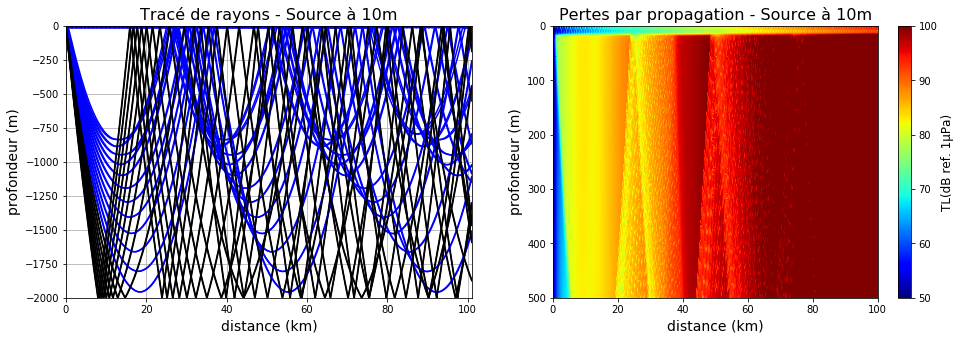

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(121)
s.plotray('10m_R.ray')
plt.title('Tracé de rayons - Source à 10m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.subplot(122)
s.plotshd (geometry10, pressure10)
plt.title ('Pertes par propagation - Source à 10m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.show()
#plt.savefig('source10m', dpi=100)

---
### . Source à 30m

(Les fichiers .env se créent suivant le même format que pour la source à 10m)

In [7]:
geometry30, pressure30 = s.readshd('30m_IB.shd')

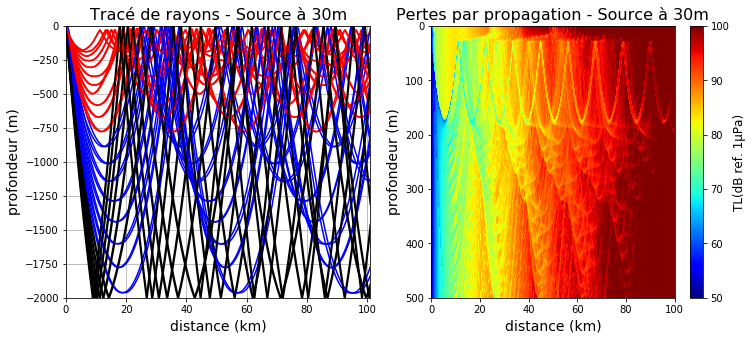

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(121)
s.plotray('30m_R.ray')
plt.title('Tracé de rayons - Source à 30m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.subplot(122)
s.plotshd (geometry30, pressure30)
plt.title ('Pertes par propagation - Source à 30m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.show()
#plt.savefig('source30m', dpi=100)

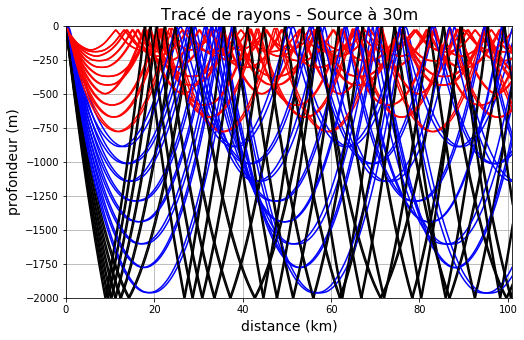

In [9]:
plt.figure(figsize=(8,5))
s.plotray('30m_R.ray')
plt.title('Tracé de rayons - Source à 30m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.show()
#plt.savefig('rays30m', dpi=100)

---

### . Source à 100m

In [10]:
geometry100, pressure100 = s.readshd('100m_IB.shd')

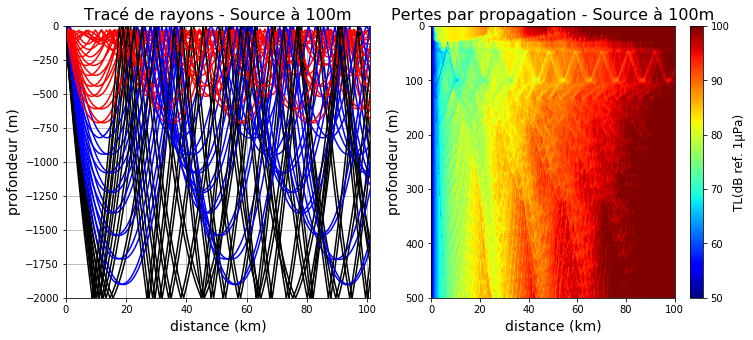

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(121)
s.plotray('100m_R.ray')
plt.title('Tracé de rayons - Source à 100m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.subplot(122)
s.plotshd (geometry100, pressure100)
plt.title ('Pertes par propagation - Source à 100m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.show()
#plt.savefig('source100m', dpi=100)

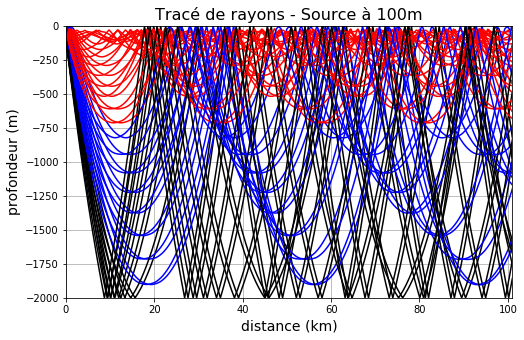

In [12]:
plt.figure(figsize=(8,5))
s.plotray('100m_R.ray')
plt.title('Tracé de rayons - Source à 100m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.show()
#plt.savefig('rays100m', dpi=100)

---
---
# Profil n°1 (Annexe E du rapport)

In [13]:
issp=0                          # sound speed profile number
depth_source = [20.,70.]        # list of chosen source depths

## 'R' files
s.params['file_type'] = 'R'
s.params['ALimites'] = [-15.0, 15.0]
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env ='SSP1_%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = 'SSP1_%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

## 'IB' files    
s.params['file_type'] = 'IB'
s.params['ALimites'] = [-90.0, 90.0]
s.params['NDepth'] = 501
s.params['NRange'] = 1001
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env = 'SSP1_%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = 'SSP1_%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

---
### . Source à 20m

In [14]:
geometry1_20, pressure1_20 = s.readshd('SSP1_20m_IB.shd')

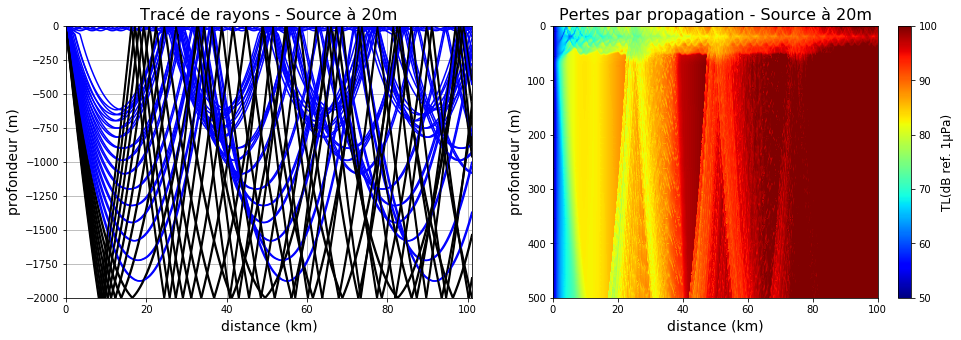

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(121)
s.plotray('SSP1_20m_R.ray')
plt.title('Tracé de rayons - Source à 20m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.subplot(122)
s.plotshd (geometry1_20, pressure1_20)
plt.title ('Pertes par propagation - Source à 20m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.show()
#plt.savefig('prof1_source20m', dpi=100)

---
### . Source à 70m

In [17]:
geometry1_70, pressure1_70 = s.readshd('SSP1_70m_IB.shd')

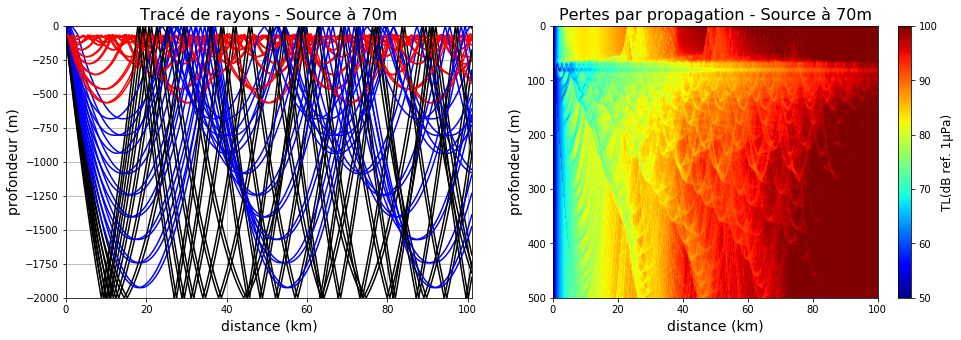

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(121)
s.plotray('SSP1_70m_R.ray')
plt.title('Tracé de rayons - Source à 70m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.subplot(122)
s.plotshd (geometry1_70, pressure1_70)
plt.title ('Pertes par propagation - Source à 70m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.show()
#plt.savefig('prof1_source70m', dpi=100)

---
---
# Profil n°2 (Annexe E du rapport)

In [19]:
issp=1                          # sound speed profile number
depth_source = [50.]            # list of chosen source depths

## 'R' files
s.params['file_type'] = 'R'
s.params['ALimites'] = [-15.0, 15.0]
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env ='SSP2_%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = 'SSP2_%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

## 'IB' files    
s.params['file_type'] = 'IB'
s.params['ALimites'] = [-90.0, 90.0]
s.params['NDepth'] = 501
s.params['NRange'] = 1001
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env = 'SSP2_%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = 'SSP2_%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

---
### . Source à 50m

In [20]:
geometry2_50, pressure2_50 = s.readshd('SSP2_50m_IB.shd')

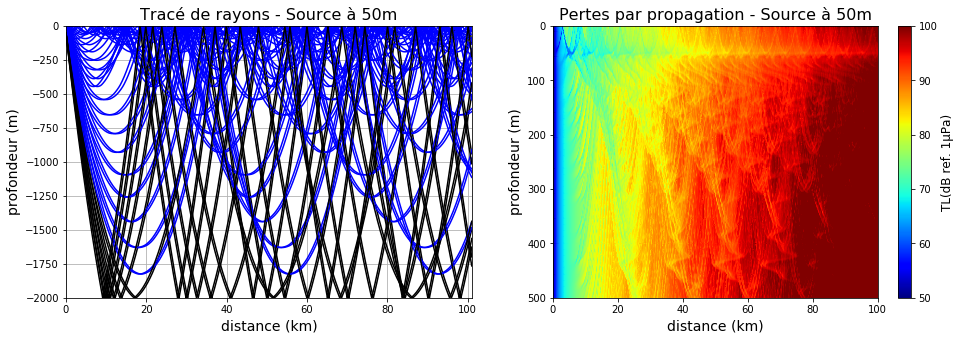

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(121)
s.plotray('SSP2_50m_R.ray')
plt.title('Tracé de rayons - Source à 50m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.subplot(122)
s.plotshd (geometry2_50, pressure2_50)
plt.title ('Pertes par propagation - Source à 50m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.show()
#plt.savefig('prof2_source50m', dpi=100)

---
---
# Profil n°4 (Annexe E du rapport)

Pour le profil 4, la célérité décroît jusqu'à 50m de profondeur, puis le gradient devient positif. 

In [22]:
issp=3                          # sound speed profile number
depth_source = [20., 60.]       # list of chosen source depths

## 'R' files
s.params['file_type'] = 'R'
s.params['ALimites'] = [-15.0, 15.0]
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env ='SSP4_%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = 'SSP4_%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

## 'IB' files    
s.params['file_type'] = 'IB'
s.params['ALimites'] = [-90.0, 90.0]
s.params['NDepth'] = 501
s.params['NRange'] = 1001
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env = 'SSP4_%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = 'SSP4_%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

---
### . Source à 20m

In [23]:
geometry4_20, pressure4_20 = s.readshd('SSP4_20m_IB.shd')

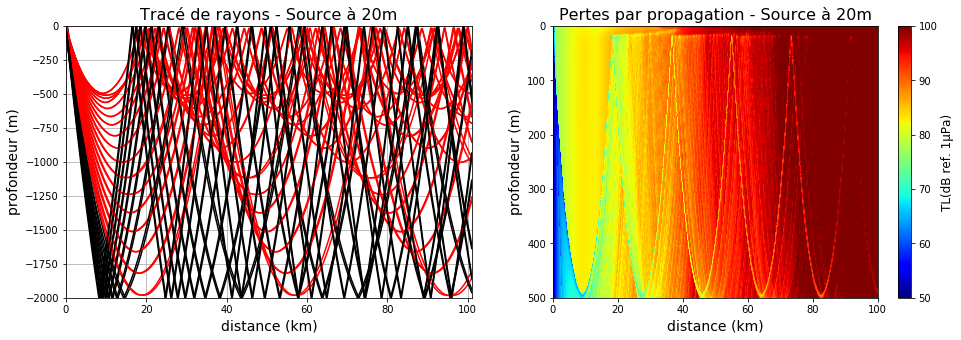

In [24]:
plt.figure(figsize=(16,5))
plt.subplot(121)
s.plotray('SSP4_20m_R.ray')
plt.title('Tracé de rayons - Source à 20m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.subplot(122)
s.plotshd (geometry4_20, pressure4_20)
plt.title ('Pertes par propagation - Source à 20m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.show()
#plt.savefig('prof4_source20m', dpi=100)

---
### . Source à 60m

In [25]:
geometry4_60, pressure4_60 = s.readshd('SSP4_60m_IB.shd')

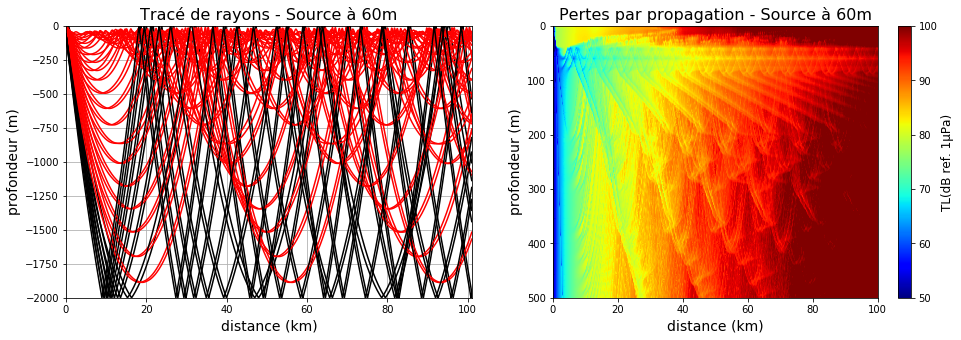

In [26]:
plt.figure(figsize=(16,5))
plt.subplot(121)
s.plotray('SSP4_60m_R.ray')
plt.title('Tracé de rayons - Source à 60m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.subplot(122)
s.plotshd (geometry4_60, pressure4_60)
plt.title ('Pertes par propagation - Source à 60m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.show()
#plt.savefig('prof4_source60m', dpi=100)

---
---
---
---
---
# Résultats pour les profils du Gulf Stream (partie 4.3)


---
## . 1er profil  

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070
Uses the following output file: /home/datawork-lops-osi/jgula/NESED/nesed_avg.00060.nc
Uses the following time : 0


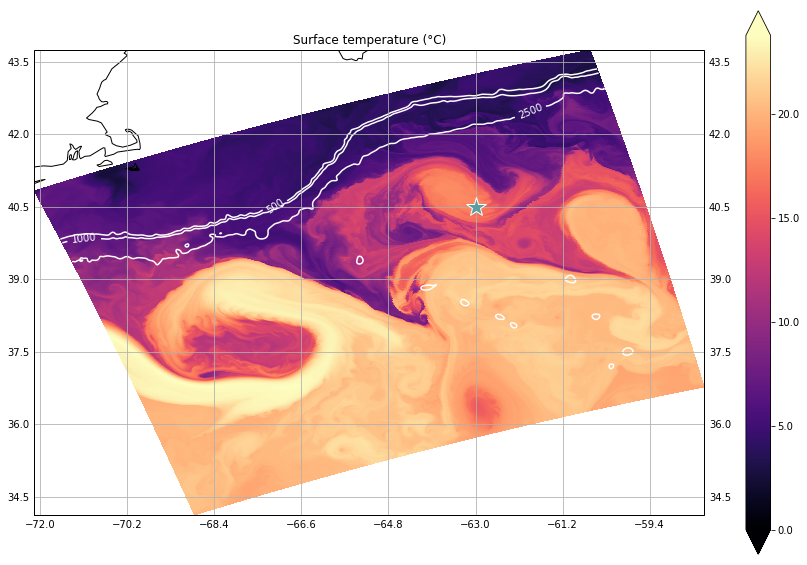

In [27]:
g = bellhop({'gs': {'datadir': '/home/datawork-lops-osi/jgula/NESED/', 'lon': -63., \
                    'lat': 40.5, 'plot_map': True, 'contour':True}}, zmax = 4900)

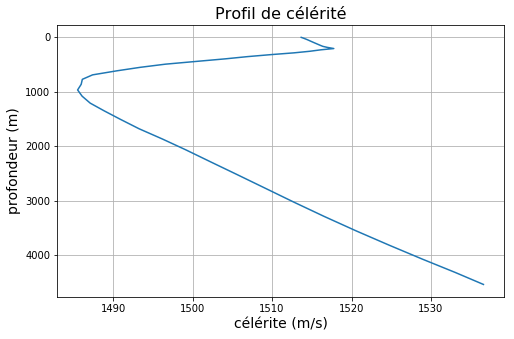

In [28]:
plt.figure(figsize=(8,5))
g.plotssp('gs', zoom= False, y_zoom = 500)
plt.title('Profil de célérité', fontsize=16)
plt.xlabel('célérite (m/s)', fontsize=14)
plt.ylabel('profondeur (m)', fontsize=14)
plt.show()
#plt.savefig('profil_GS1', dpi=100)

In [29]:
issp=0                          # sound speed profile number
depth_source = [100.]           # list of chosen source depths

## 'R' files
g.params['file_type'] = 'R'
g.params['ALimites'] = [-15.0, 15.0]
for i in depth_source : 
    g.params['zs']=i
    g.generate_envfile('gs',Issp=issp, SSP_depth_step=1, \
                        file_env ='GS1_%dm_%s.env' %(i,g.params['file_type']))
    g.generate_btyfile(file_env = 'GS1_%dm_%s.env' %(i,g.params['file_type']), bathy=4000.)

## 'IB' files    
g.params['file_type'] = 'IB'
g.params['ALimites'] = [-90.0, 90.0]
g.params['NDepth'] = 501
g.params['NRange'] = 1001
for i in depth_source : 
    g.params['zs']=i
    g.generate_envfile('gs',Issp=issp, SSP_depth_step=1, \
                        file_env = 'GS1_%dm_%s.env' %(i,g.params['file_type']))
    g.generate_btyfile(file_env = 'GS1_%dm_%s.env' %(i,g.params['file_type']), bathy=4000.)

### . Source à 100m

In [30]:
geometry_GS1, pressure_GS1 = g.readshd('GS1_100m_IB.shd')

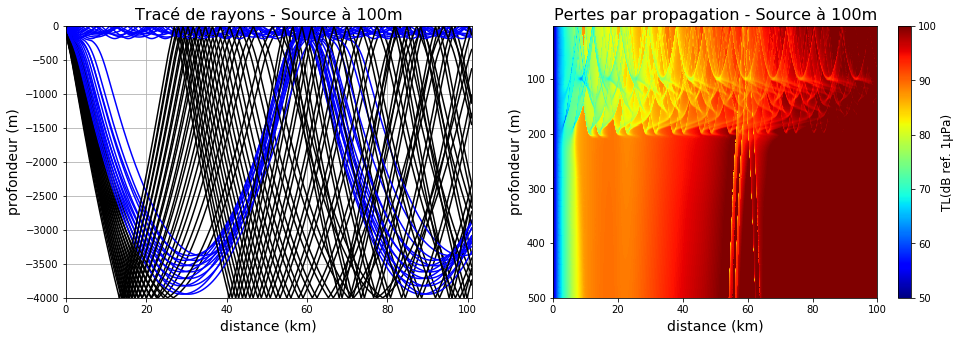

In [31]:
plt.figure(figsize=(16,5))
plt.subplot(121)
g.plotray('GS1_100m_R.ray')
plt.title('Tracé de rayons - Source à 100m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.subplot(122)
g.plotshd (geometry_GS1, pressure_GS1)
plt.title ('Pertes par propagation - Source à 100m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.show()
#plt.savefig('GS1_source100m', dpi=100)

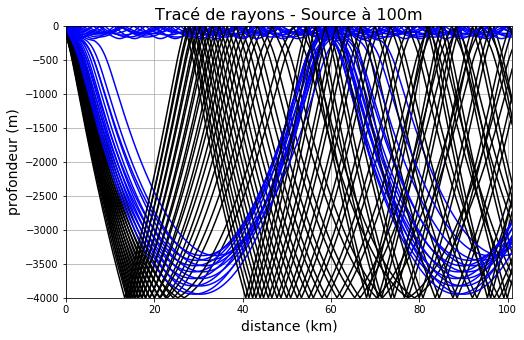

In [32]:
plt.figure(figsize=(8,5))
g.plotray('GS1_100m_R.ray')
plt.title('Tracé de rayons - Source à 100m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.show()
#plt.savefig('GS1_source100m', dpi=100)

---
---
---
## . 3ème profil

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070
Uses the following output file: /home/datawork-lops-osi/jgula/NESED/nesed_avg.00060.nc
Uses the following time : 0


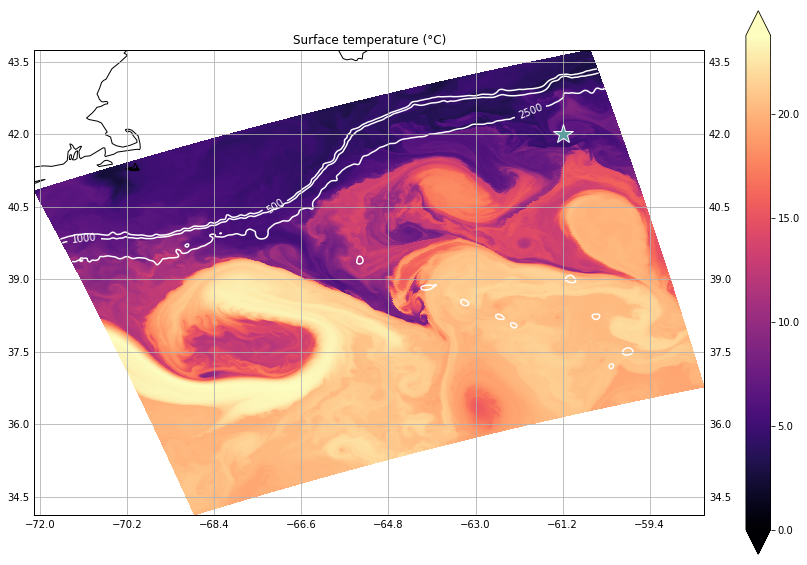

In [33]:
g2 = bellhop({'gs': {'datadir': '/home/datawork-lops-osi/jgula/NESED/', 'lon': -61.2, \
                    'lat': 42., 'plot_map': True, 'contour':True}}, zmax = 4900)

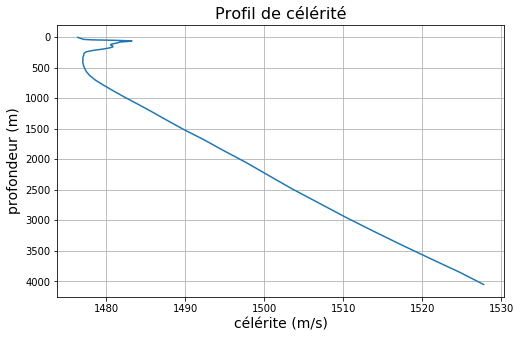

In [34]:
plt.figure(figsize=(8,5))
g2.plotssp('gs', zoom= False)
plt.title('Profil de célérité', fontsize=16)
plt.xlabel('célérite (m/s)', fontsize=14)
plt.ylabel('profondeur (m)', fontsize=14)
plt.show()
#plt.savefig('profil_GS2', dpi=100)

In [35]:
issp=0                          # sound speed profile number
depth_source = [100.]           # list of chosen source depths

## 'R' files
g2.params['file_type'] = 'R'
g2.params['ALimites'] = [-15.0, 15.0]
for i in depth_source : 
    g2.params['zs']=i
    g2.generate_envfile('gs',Issp=issp, SSP_depth_step=1, \
                        file_env ='GS2_%dm_%s.env' %(i,g2.params['file_type']))
    g2.generate_btyfile(file_env = 'GS2_%dm_%s.env' %(i,g2.params['file_type']), bathy=4000.)

## 'IB' files    
g2.params['file_type'] = 'IB'
g2.params['ALimites'] = [-90.0, 90.0]
g2.params['NDepth'] = 501
g2.params['NRange'] = 1001
for i in depth_source : 
    g2.params['zs']=i
    g2.generate_envfile('gs',Issp=issp, SSP_depth_step=1, \
                        file_env = 'GS2_%dm_%s.env' %(i,g2.params['file_type']))
    g2.generate_btyfile(file_env = 'GS2_%dm_%s.env' %(i,g2.params['file_type']), bathy=4000.)

In [36]:
geometry_GS2, pressure_GS2 = g2.readshd('GS2_100m_IB.shd')

Text(0,0.5,'profondeur (m)')

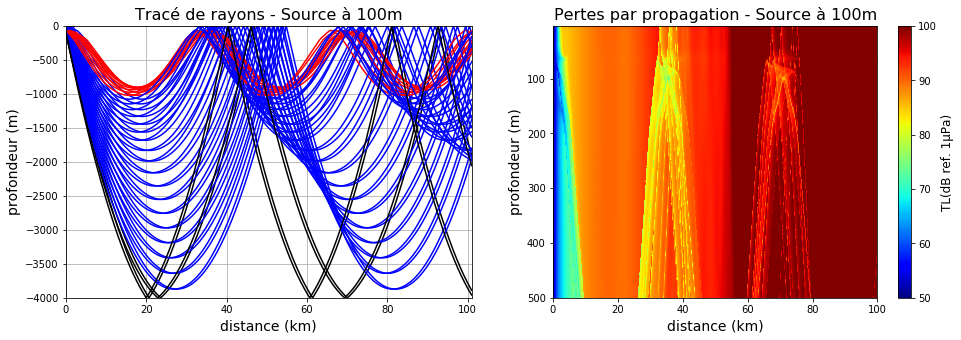

In [37]:
plt.figure(figsize=(16,5))

plt.subplot(121)
g2.plotray('GS2_100m_R.ray')
plt.title('Tracé de rayons - Source à 100m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.subplot(122)
g2.plotshd (geometry_GS2, pressure_GS2)
plt.title ('Pertes par propagation - Source à 100m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)


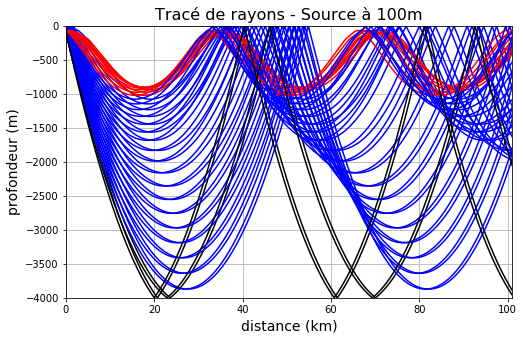

In [38]:
plt.figure(figsize=(8,5))
g2.plotray('GS2_100m_R.ray')
plt.title('Tracé de rayons - Source à 100m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)
plt.savefig('GS2_source100m', dpi=100)